In [ ]:
import wandb
import matplotlib.pyplot as plt

In [37]:
api = wandb.Api()

ENTITY = "cormaccureton-mcgill-university"
PROJECT = "Decomp"

In [38]:
sudoku_run_ids = {
    '1B_base_zero_shot': '8hn31j2b',
    '1B_base_three_shot': 'hqs8jq3u',
    '3B_base_zero_shot': 'c36fpx5t',
    '3B_base_three_shot': '2xyh0auj',
    '1B_lora_sudoku_zero_shot': 'fqttj0i4',
    '3B_lora_sudoku_zero_shot': 'pmap2mgv',
    '1B_lora_sos_zero_shot': 'or7lxu1c',
    '1B_lora_sos_three_shot': 'euxb54kd',
    '3B_lora_sos_zero_shot': 'ekgysini',
    '3B_lora_sos_three_shot': 'f941zznq',
}

In [39]:
# Pull the data from wandb
sudoku_data = {}
for key, run_id in sudoku_run_ids.items():
    run = api.run(f"{ENTITY}/{PROJECT}/{run_id}")
    sudoku_data[key] = run.history()

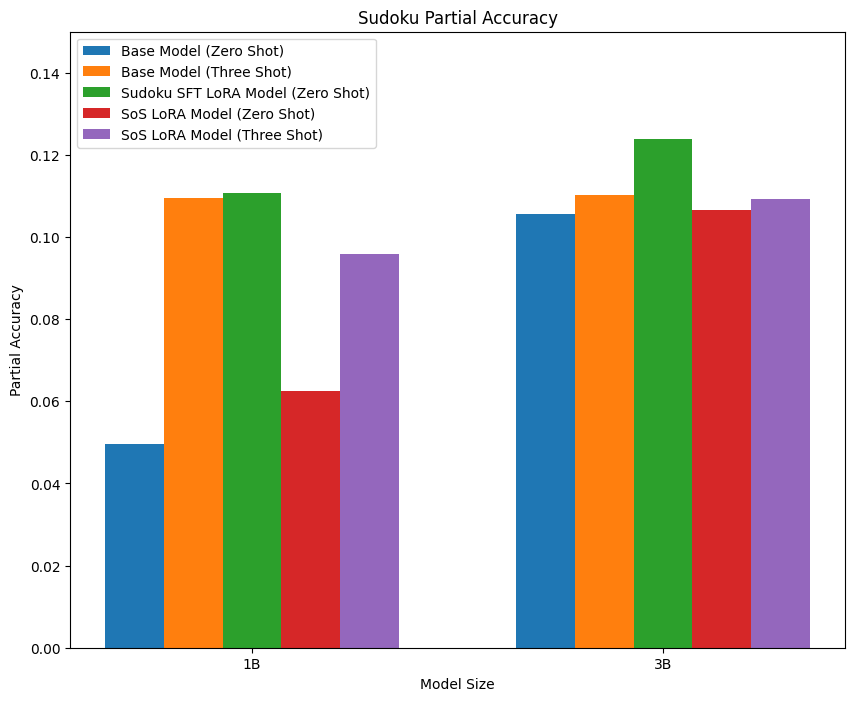

In [99]:
acc_key = 'eval/partial_accuracy'

# Plot partial accuracies
# Extract partial accuracies for each run
partial_accuracies = {key: data[acc_key].dropna().values[0] for key, data in sudoku_data.items()}

# Group by base model size
grouped_accuracies = {
    'Base Model (Zero Shot)': {k: v for k, v in partial_accuracies.items() if 'base_zero_shot' in k},
    'Base Model (Three Shot)': {k: v for k, v in partial_accuracies.items() if 'base_three_shot' in k},
    'Sudoku SFT LoRA Model (Zero Shot)': {k: v for k, v in partial_accuracies.items() if 'lora_sudoku_zero_shot' in k},
    'SoS LoRA Model (Zero Shot)': {k: v for k, v in partial_accuracies.items() if 'lora_sos_zero_shot' in k},
    'SoS LoRA Model (Three Shot)': {k: v for k, v in partial_accuracies.items() if 'lora_sos_three_shot' in k},
}


fig, ax = plt.subplots()
bar_width = 0.1
# make the plot larger
fig.set_size_inches(10, 8)

# Plot grouped bar chart
labels = ['1B', '3B']
offset = bar_width * (len(grouped_accuracies) - 1) / 2
x = [1.5, 2.2]

# Plot bars for each group
for i, (group, accuracies) in enumerate(grouped_accuracies.items()):
    # print(group)
    # print(accuracies)
    ax.bar(x=[xi + i * bar_width for xi in x], height=accuracies.values(), width=0.1, label=group)


# Add labels and title
ax.set_xlabel('Model Size')
ax.set_ylabel('Partial Accuracy')
ax.set_title('Sudoku Partial Accuracy')
ax.set_xticks([xi + offset for xi in x])
ax.set_xticklabels(labels)
ax.legend(loc='upper left')
ax.set_ybound(0, 0.15)



plt.show()


In [69]:
zebra_run_ids = {
    '1B_base_zero_shot': 'fbdn4pew',
    '1B_base_three_shot': 'jz93mq9i',
    '3B_base_zero_shot': '82o5kux1',
    '3B_base_three_shot': 'y4nmlmr3',
    '1B_lora_zebra_zero_shot': 'cwrj2vs8',
    '3B_lora_zebra_zero_shot': 'm9u40trr',
    '1B_lora_sos_zero_shot': 'eshxpsy0',
    '1B_lora_sos_three_shot': 'x2j6es2h',
    '3B_lora_sos_zero_shot': '8lteh1es',
    '3B_lora_sos_three_shot': '1e49rfat',
}

In [70]:
# Pull the data from wandb
zebra_data = {}
for key, run_id in zebra_run_ids.items():
    run = api.run(f"{ENTITY}/{PROJECT}/{run_id}")
    zebra_data[key] = run.history()

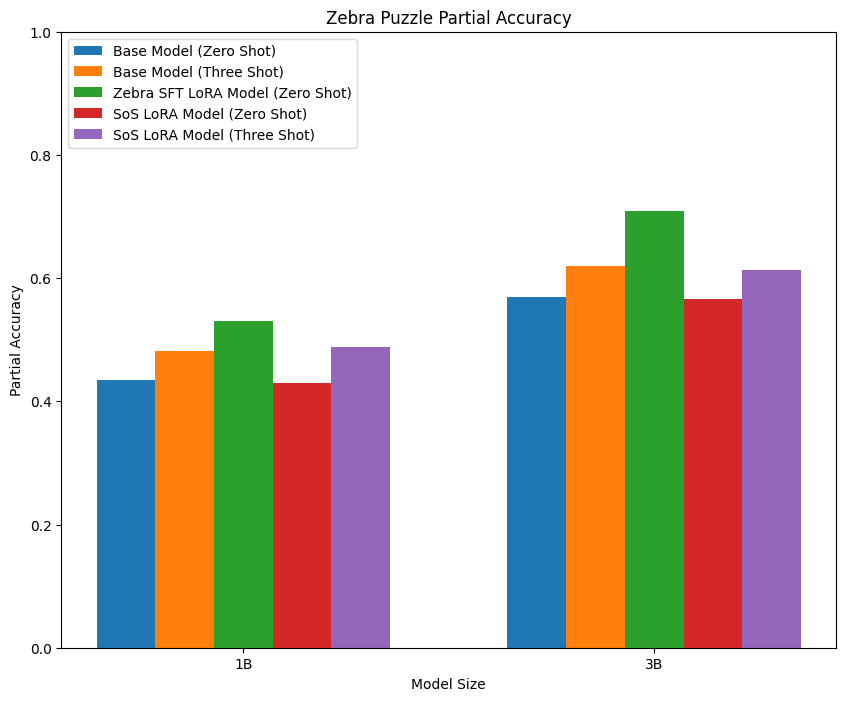

In [78]:
acc_key = 'eval/partial_accuracy'

# Plot partial accuracies
# Extract partial accuracies for each run
partial_accuracies = {key: data[acc_key].dropna().values[0] for key, data in zebra_data.items()}

# Group by base model size
grouped_accuracies = {
    'Base Model (Zero Shot)': {k: v for k, v in partial_accuracies.items() if 'base_zero_shot' in k},
    'Base Model (Three Shot)': {k: v for k, v in partial_accuracies.items() if 'base_three_shot' in k},
    'Zebra SFT LoRA Model (Zero Shot)': {k: v for k, v in partial_accuracies.items() if 'lora_zebra_zero_shot' in k},
    'SoS LoRA Model (Zero Shot)': {k: v for k, v in partial_accuracies.items() if 'lora_sos_zero_shot' in k},
    'SoS LoRA Model (Three Shot)': {k: v for k, v in partial_accuracies.items() if 'lora_sos_three_shot' in k},
}

fig, ax = plt.subplots()
bar_width = 0.1
# make the plot larger
fig.set_size_inches(10, 8)

# Plot grouped bar chart
labels = ['1B', '3B']
offset = bar_width * (len(grouped_accuracies) - 1) / 2
x = [1.5, 2.2]

# Plot bars for each group
for i, (group, accuracies) in enumerate(grouped_accuracies.items()):
    # print(group)
    # print(accuracies)
    ax.bar(x=[xi + i * bar_width for xi in x], height=accuracies.values(), width=0.1, label=group)


# Add labels and title
ax.set_xlabel('Model Size')
ax.set_ylabel('Partial Accuracy')
ax.set_title('Zebra Puzzle Partial Accuracy')
ax.set_xticks([xi + offset for xi in x])
ax.set_ybound(0, 1)
ax.set_xticklabels(labels)
ax.legend(loc='upper left')


plt.show()

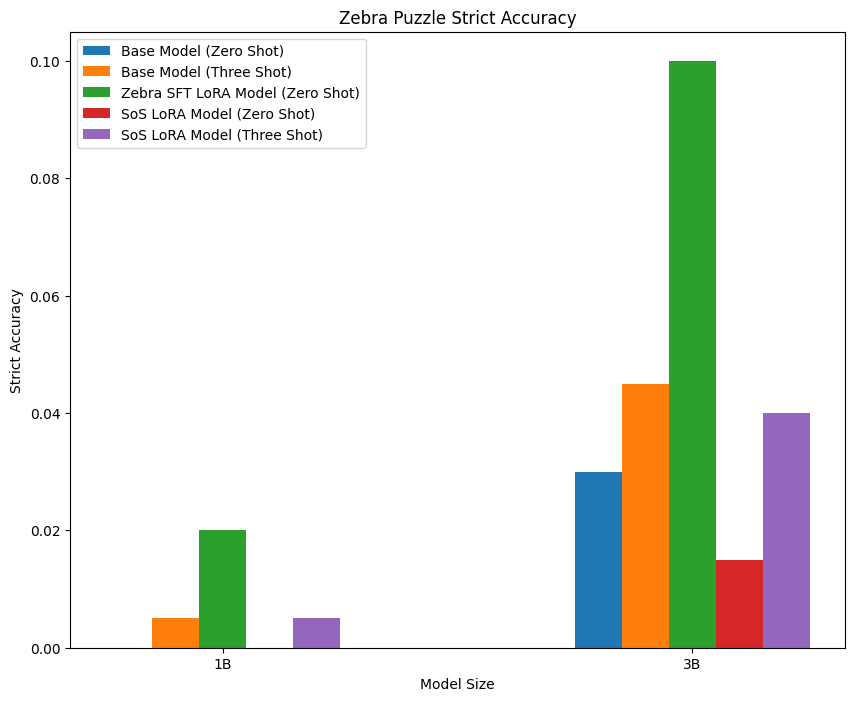

In [97]:
acc_key = 'eval/strict_accuracy'

# Plot partial accuracies
# Extract partial accuracies for each run
partial_accuracies = {key: data[acc_key].dropna().values[0] for key, data in zebra_data.items()}

# Group by base model size
grouped_accuracies = {
    'Base Model (Zero Shot)': {k: v for k, v in partial_accuracies.items() if 'base_zero_shot' in k},
    'Base Model (Three Shot)': {k: v for k, v in partial_accuracies.items() if 'base_three_shot' in k},
    'Zebra SFT LoRA Model (Zero Shot)': {k: v for k, v in partial_accuracies.items() if 'lora_zebra_zero_shot' in k},
    'SoS LoRA Model (Zero Shot)': {k: v for k, v in partial_accuracies.items() if 'lora_sos_zero_shot' in k},
    'SoS LoRA Model (Three Shot)': {k: v for k, v in partial_accuracies.items() if 'lora_sos_three_shot' in k},
}

fig, ax = plt.subplots()
bar_width = 0.1
# make the plot larger
fig.set_size_inches(10, 8)

# Plot grouped bar chart
labels = ['1B', '3B']
offset = bar_width * (len(grouped_accuracies) - 1) / 2
x = [1, 2]

# Plot bars for each group
for i, (group, accuracies) in enumerate(grouped_accuracies.items()):
    # print(group)
    # print(accuracies)
    ax.bar(x=[xi + i * bar_width for xi in x], height=accuracies.values(), width=0.1, label=group)


# Add labels and title
ax.set_xlabel('Model Size')
ax.set_ylabel('Strict Accuracy')
ax.set_title('Zebra Puzzle Strict Accuracy')
ax.set_xticks([xi + offset for xi in x])
ax.set_xticklabels(labels)
ax.legend(loc='upper left')

plt.show()